In [29]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import rc
import warnings
warnings.filterwarnings("ignore")

rc("text", usetex=True)

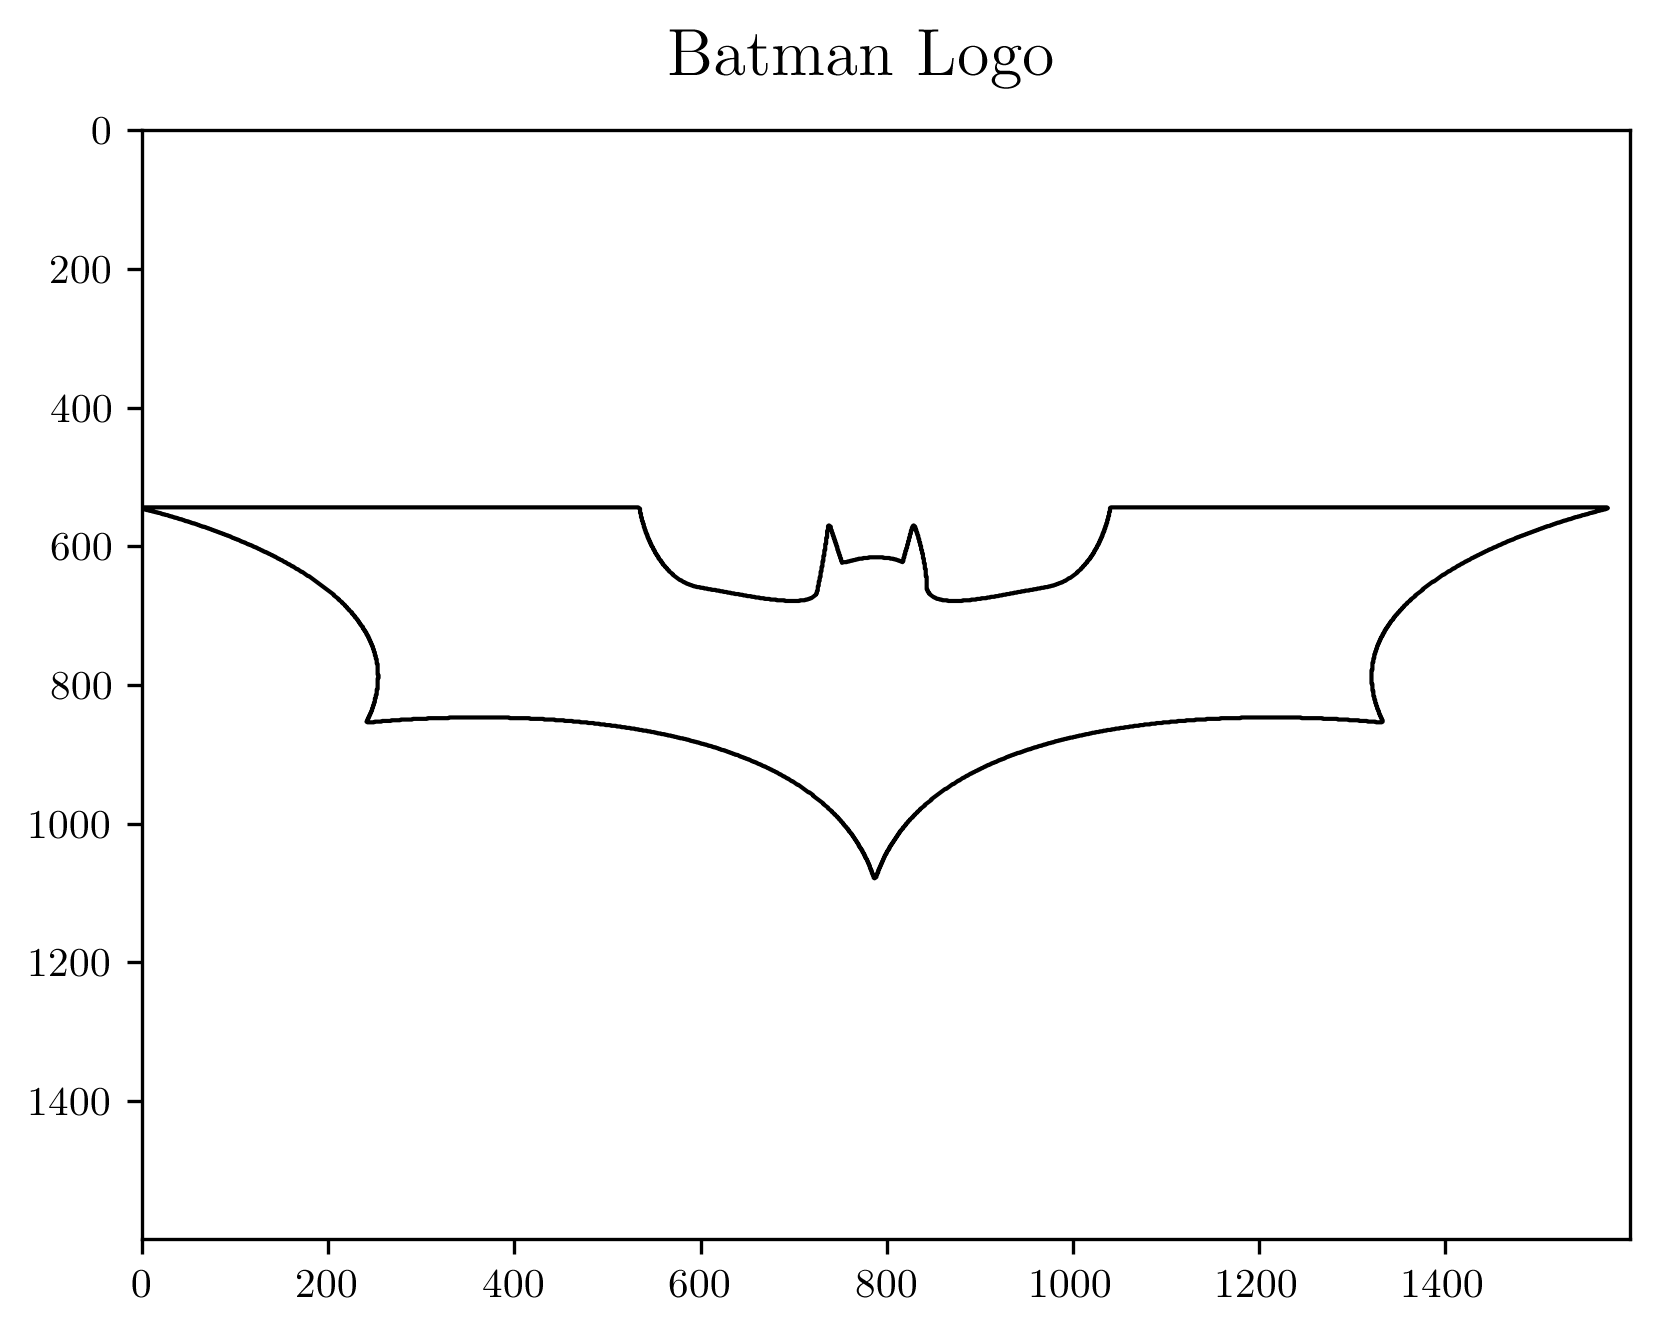

In [32]:
img = Image.open('batman.png')
img = np.array(img)
img = np.max(img) - img # invert image
fig, ax = plt.subplots(dpi = 300)
contours = ax.contour(img, levels=[0], linewidths=1, colors='k')
meanX, meanY = 0, 0
for item in contours.collections:
    for path in item.get_paths():
        meanX += np.mean(path.vertices[:, 0])
        meanY += np.mean(path.vertices[:, 1])
ax.invert_yaxis()
fig.suptitle('Batman Logo', fontsize=16, fontweight='bold', y=0.95)
fig.show()

In [36]:
#get the coordinates of the contour
with open('batman.js', 'w') as f:
    for (j, item) in enumerate(contours.collections):
        paths = item.get_paths()
        for (i, path) in enumerate(paths):
            v = path.vertices
            xs = v[:,0]
            ys = v[:,1]
            f.write(f"let batman = [\n")
            for x, y in zip(xs, ys):
                #scale the coordinates to fit the screen
                f.write("{ x: " + str((x-meanX)/2.5) + ", y: " + str((y-meanY)/2.5) + " },\n")
            f.write("];\n")